# Classification Experiments with Decision Trees

This notebook performs classification experiments using our custom Decision Tree implementation on a synthetic dataset.

## Objectives:
- **Part A**: Train-test split evaluation (70%-30%)
- **Part B**: 5-fold cross-validation with nested CV for optimal depth selection
- Compare Information Gain vs Gini Index criteria
- Find optimal tree depth using cross-validation

## Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from IPython.display import display

np.random.seed(42)
print("Libraries imported successfully!")
print("IPython.display imported for dataframe visualization")

Libraries imported successfully!
IPython.display imported for dataframe visualization


## Data Generation and Visualization

GENERATING SYNTHETIC CLASSIFICATION DATASET

    Feature1  Feature2  Target
0   0.800227 -0.285654       1
1   0.941844 -0.060086       1
2  -0.347924 -0.866213       0
3  -0.222150 -0.911294       0
4  -0.772215 -0.240549       0
..       ...       ...     ...
95  0.440461 -0.600299       1
96 -0.345212  1.160864       0
97 -0.923689 -0.108154       0
98  0.482517 -0.161524       1
99 -0.794011 -0.049227       0

[100 rows x 3 columns]
Dataset shape: (100, 2)
Number of classes: 2
Class distribution: [50 50]


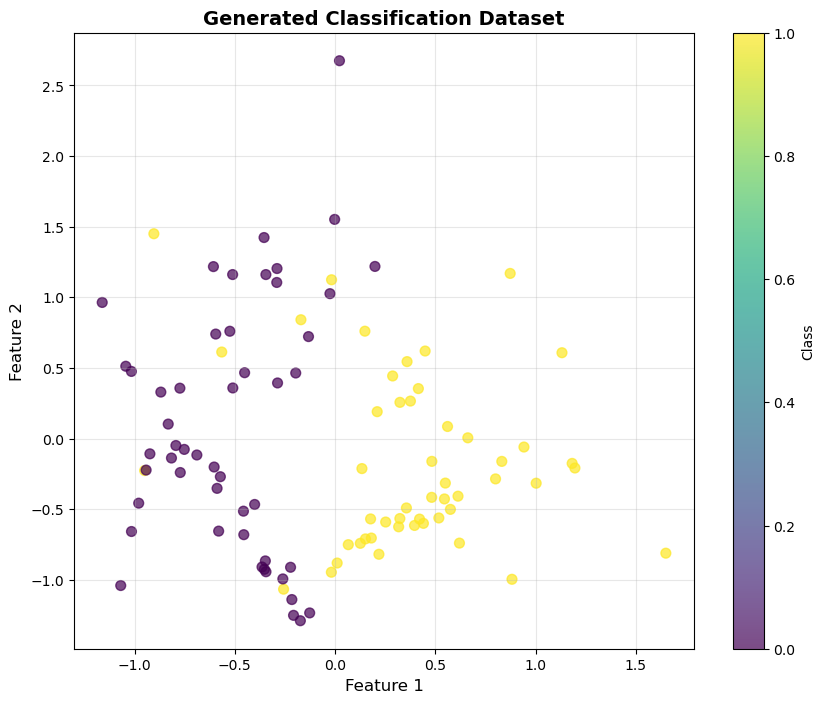

In [2]:
# Generate synthetic classification dataset
print("GENERATING SYNTHETIC CLASSIFICATION DATASET")
print()

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, 
    random_state=1, n_clusters_per_class=2, class_sep=0.5
)

df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Target"] = y 

print(df) 
print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))
print("Class distribution:", np.bincount(y))

# Visualize the dataset
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
plt.title('Generated Classification Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

## Data Preparation

In [3]:
# Convert to pandas for consistency with our DecisionTree implementation
X_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y_series = pd.Series(y)

print("Data converted to pandas format:")
print(f"X shape: {X_df.shape}")
print(f"y shape: {y_series.shape}")
print(f"\nFirst few rows:")
display(X_df.head())
print(f"\nTarget distribution:")
display(y_series.value_counts().sort_index())

Data converted to pandas format:
X shape: (100, 2)
y shape: (100,)

First few rows:


,feature_1,feature_2
0,0.800227,-0.285654
1,0.941844,-0.060086
2,-0.347924,-0.866213
3,-0.222150,-0.911294
4,-0.772215,-0.240549



Target distribution:


0    50
1    50
Name: count, dtype: int64

## Part A: Train-Test Split Evaluation (70%-30%)

In [4]:
print("PART (A): TRAIN-TEST SPLIT EVALUATION")
print()

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_series, test_size=0.3, random_state=42, stratify=y_series
)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"Training class distribution: {y_train.value_counts().sort_index().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().sort_index().to_dict()}")

PART (A): TRAIN-TEST SPLIT EVALUATION

Training set size: 70 samples
Test set size: 30 samples
Training class distribution: {0: 35, 1: 35}
Test class distribution: {0: 15, 1: 15}


### Testing Information Gain Criterion

In [5]:
print("\nDECISION TREE WITH INFORMATION GAIN")
print()

# Create and train the decision tree
dt_ig = DecisionTree(criterion="information_gain", max_depth=5)
dt_ig.fit(X_train, y_train)

# Make predictions
y_pred_ig = dt_ig.predict(X_test)

# Calculate metrics
test_accuracy_ig = accuracy(y_pred_ig, y_test)
print(f"Test Accuracy: {test_accuracy_ig:.4f}")

# Per-class precision and recall
unique_classes = np.unique(y_test)
print("\nPer-class Metrics:")
print("Class | Precision | Recall")
print("------|-----------|-------")

for cls in unique_classes:
    prec = precision(y_pred_ig, y_test, cls)
    rec = recall(y_pred_ig, y_test, cls)
    print(f"  {cls}   |   {prec:.4f}   | {rec:.4f}")


DECISION TREE WITH INFORMATION GAIN

Test Accuracy: 0.7333

Per-class Metrics:
Class | Precision | Recall
------|-----------|-------
  0   |   0.7333   | 0.7333
  1   |   0.7333   | 0.7333



Decision Tree Structure (Information Gain):

Graphical Visualization:


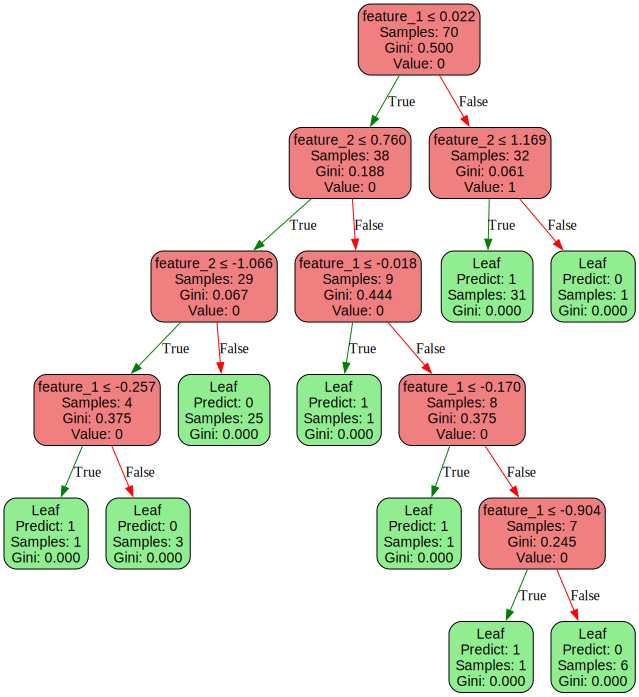

Tree visualization displayed above


In [7]:
# Display the tree structure
print(f"\nDecision Tree Structure (Information Gain):")
# dt_ig.plot()

# Create graphical visualization
print(f"\nGraphical Visualization:")
try:
    graph_ig = dt_ig.create_graph(feature_names=['feature_1', 'feature_2'])
    if graph_ig:
        print("Tree visualization displayed above")
    else:
        print("Graphviz not available")
except Exception as e:
    print(f"Error creating graph: {e}")

### Testing Gini Index Criterion

In [8]:
print("\nDECISION TREE WITH GINI INDEX")
print()

# Create and train the decision tree
dt_gini = DecisionTree(criterion="gini_index", max_depth=5)
dt_gini.fit(X_train, y_train)

# Make predictions
y_pred_gini = dt_gini.predict(X_test)

# Calculate metrics
test_accuracy_gini = accuracy(y_pred_gini, y_test)
print(f"Test Accuracy: {test_accuracy_gini:.4f}")

# Per-class precision and recall
print("\nPer-class Metrics:")
print("Class | Precision | Recall")
print("------|-----------|-------")

for cls in unique_classes:
    prec = precision(y_pred_gini, y_test, cls)
    rec = recall(y_pred_gini, y_test, cls)
    print(f"  {cls}   |   {prec:.4f}   | {rec:.4f}")


DECISION TREE WITH GINI INDEX

Test Accuracy: 0.7333

Per-class Metrics:
Class | Precision | Recall
------|-----------|-------
  0   |   0.7333   | 0.7333
  1   |   0.7333   | 0.7333



Decision Tree Structure (Gini Index):

Graphical Visualization:


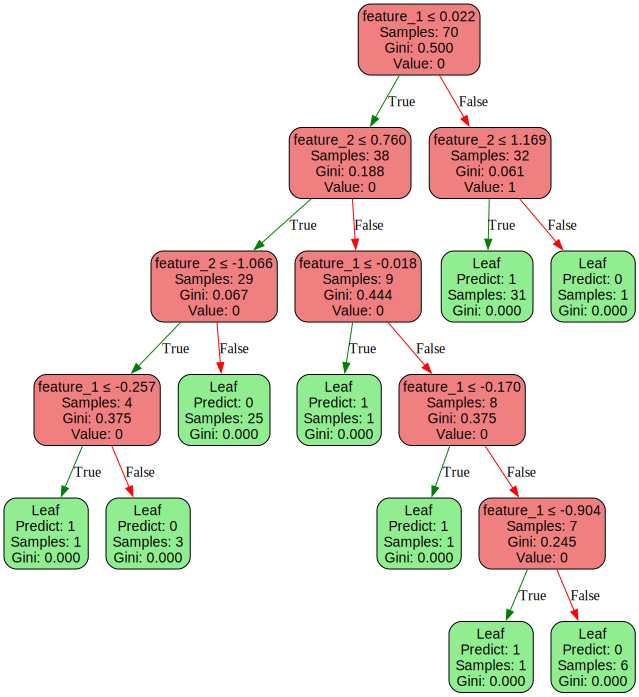

Tree visualization displayed above


In [10]:
# Display the tree structure
print(f"\nDecision Tree Structure (Gini Index):")
# dt_gini.plot()

# Create graphical visualization
print(f"\nGraphical Visualization:")
try:
    graph_gini = dt_gini.create_graph(feature_names=['feature_1', 'feature_2'])
    if graph_gini:
        print("Tree visualization displayed above")
    else:
        print("Graphviz not available")
except Exception as e:
    print(f"Error creating graph: {e}")

## Part B: 5-Fold Cross-Validation with Nested CV

In [11]:
print("PART (B): 5-FOLD CROSS-VALIDATION WITH NESTED CV")
print()

def cross_validate_depth(X, y, criterion, depths, k_folds=5):
    """
    Perform nested cross-validation to find optimal depth
    """
    kf_outer = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    outer_scores = []
    optimal_depths = []
    
    for fold, (train_idx, test_idx) in enumerate(kf_outer.split(X)):
        print(f"\nOuter Fold {fold + 1}:")
        
        # Split data for outer fold
        X_train_outer = X.iloc[train_idx]
        y_train_outer = y.iloc[train_idx]
        X_test_outer = X.iloc[test_idx]
        y_test_outer = y.iloc[test_idx]
        
        # Inner cross-validation for hyperparameter tuning
        kf_inner = KFold(n_splits=k_folds, shuffle=True, random_state=42)
        
        depth_scores = {}
        for depth in depths:
            inner_scores = []
            
            for train_inner_idx, val_idx in kf_inner.split(X_train_outer):
                X_train_inner = X_train_outer.iloc[train_inner_idx]
                y_train_inner = y_train_outer.iloc[train_inner_idx]
                X_val = X_train_outer.iloc[val_idx]
                y_val = y_train_outer.iloc[val_idx]
                
                # Train and evaluate
                dt = DecisionTree(criterion=criterion, max_depth=depth)
                dt.fit(X_train_inner, y_train_inner)
                y_pred_val = dt.predict(X_val)
                
                inner_scores.append(accuracy(y_pred_val, y_val))
            
            depth_scores[depth] = np.mean(inner_scores)
        
        # Find optimal depth for this outer fold
        optimal_depth = max(depth_scores, key=depth_scores.get)
        optimal_depths.append(optimal_depth)
        
        print(f"  Depth scores: {depth_scores}")
        print(f"  Optimal depth: {optimal_depth}")
        
        # Train final model on full outer training set with optimal depth
        dt_final = DecisionTree(criterion=criterion, max_depth=optimal_depth)
        dt_final.fit(X_train_outer, y_train_outer)
        y_pred_outer = dt_final.predict(X_test_outer)
        
        outer_score = accuracy(y_pred_outer, y_test_outer)
        outer_scores.append(outer_score)
        print(f"  Outer fold accuracy: {outer_score:.4f}")
    
    return outer_scores, optimal_depths

print("Nested cross-validation function defined!")

PART (B): 5-FOLD CROSS-VALIDATION WITH NESTED CV

Nested cross-validation function defined!


In [12]:
# Test different depths
depths_to_test = [1, 2, 3, 4, 5, 6, 7, 8]
criteria = ["information_gain", "gini_index"]

print(f"Testing depths: {depths_to_test}")
print(f"Using 5-fold nested cross-validation...")

Testing depths: [1, 2, 3, 4, 5, 6, 7, 8]
Using 5-fold nested cross-validation...


### Nested CV for Information Gain

In [13]:
print(f"\nNESTED CV FOR INFORMATION GAIN")
print()

outer_scores_ig, optimal_depths_ig = cross_validate_depth(
    X_df, y_series, "information_gain", depths_to_test, k_folds=5
)

print(f"\nSummary for Information Gain:")
print(f"Cross-validation scores: {[f'{score:.4f}' for score in outer_scores_ig]}")
print(f"Mean CV accuracy: {np.mean(outer_scores_ig):.4f} ± {np.std(outer_scores_ig):.4f}")
print(f"Optimal depths per fold: {optimal_depths_ig}")
print(f"Most frequent optimal depth: {max(set(optimal_depths_ig), key=optimal_depths_ig.count)}")


NESTED CV FOR INFORMATION GAIN


Outer Fold 1:
  Depth scores: {1: np.float64(0.8625), 2: np.float64(0.875), 3: np.float64(0.825), 4: np.float64(0.8), 5: np.float64(0.8125), 6: np.float64(0.825), 7: np.float64(0.775), 8: np.float64(0.75)}
  Optimal depth: 2
  Outer fold accuracy: 0.9500

Outer Fold 2:
  Depth scores: {1: np.float64(0.9125), 2: np.float64(0.9), 3: np.float64(0.8875), 4: np.float64(0.8875), 5: np.float64(0.8875), 6: np.float64(0.8875), 7: np.float64(0.8875), 8: np.float64(0.8875)}
  Optimal depth: 1
  Outer fold accuracy: 0.8000

Outer Fold 3:
  Depth scores: {1: np.float64(0.925), 2: np.float64(0.9), 3: np.float64(0.875), 4: np.float64(0.85), 5: np.float64(0.8375), 6: np.float64(0.825), 7: np.float64(0.825), 8: np.float64(0.825)}
  Optimal depth: 1
  Outer fold accuracy: 0.8500

Outer Fold 4:
  Depth scores: {1: np.float64(0.875), 2: np.float64(0.8875), 3: np.float64(0.8625), 4: np.float64(0.8125), 5: np.float64(0.8), 6: np.float64(0.775), 7: np.float64(0.7625), 8: np.

### Nested CV for Gini Index

In [14]:
print(f"\nNESTED CV FOR GINI INDEX")
print()

outer_scores_gini, optimal_depths_gini = cross_validate_depth(
    X_df, y_series, "gini_index", depths_to_test, k_folds=5
)

print(f"\nSummary for Gini Index:")
print(f"Cross-validation scores: {[f'{score:.4f}' for score in outer_scores_gini]}")
print(f"Mean CV accuracy: {np.mean(outer_scores_gini):.4f} ± {np.std(outer_scores_gini):.4f}")
print(f"Optimal depths per fold: {optimal_depths_gini}")
print(f"Most frequent optimal depth: {max(set(optimal_depths_gini), key=optimal_depths_gini.count)}")


NESTED CV FOR GINI INDEX


Outer Fold 1:
  Depth scores: {1: np.float64(0.8625), 2: np.float64(0.875), 3: np.float64(0.8375), 4: np.float64(0.8125), 5: np.float64(0.775), 6: np.float64(0.7625), 7: np.float64(0.7625), 8: np.float64(0.7375)}
  Optimal depth: 2
  Outer fold accuracy: 0.9500

Outer Fold 2:
  Depth scores: {1: np.float64(0.9125), 2: np.float64(0.9), 3: np.float64(0.8875), 4: np.float64(0.8875), 5: np.float64(0.8875), 6: np.float64(0.8875), 7: np.float64(0.8875), 8: np.float64(0.8875)}
  Optimal depth: 1
  Outer fold accuracy: 0.8000

Outer Fold 3:
  Depth scores: {1: np.float64(0.925), 2: np.float64(0.9), 3: np.float64(0.9), 4: np.float64(0.875), 5: np.float64(0.8375), 6: np.float64(0.825), 7: np.float64(0.825), 8: np.float64(0.825)}
  Optimal depth: 1
  Outer fold accuracy: 0.8500

Outer Fold 4:
  Depth scores: {1: np.float64(0.875), 2: np.float64(0.8875), 3: np.float64(0.8625), 4: np.float64(0.8), 5: np.float64(0.8), 6: np.float64(0.775), 7: np.float64(0.7625), 8: np.flo

## Simple Cross-Validation for Overall Best Depth

In [15]:
print(f"\nSIMPLE CV FOR OVERALL BEST DEPTH")
print()

def simple_cv_for_depth(X, y, criterion, depths, k_folds=5):
    """Simple cross-validation to find best depth"""
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    depth_scores = {}
    for depth in depths:
        scores = []
        for train_idx, val_idx in kf.split(X):
            X_train_cv = X.iloc[train_idx]
            y_train_cv = y.iloc[train_idx]
            X_val_cv = X.iloc[val_idx]
            y_val_cv = y.iloc[val_idx]
            
            dt = DecisionTree(criterion=criterion, max_depth=depth)
            dt.fit(X_train_cv, y_train_cv)
            y_pred_cv = dt.predict(X_val_cv)
            scores.append(accuracy(y_pred_cv, y_val_cv))
        
        depth_scores[depth] = np.mean(scores)
    
    return depth_scores

print("Simple cross-validation function defined!")


SIMPLE CV FOR OVERALL BEST DEPTH

Simple cross-validation function defined!


In [16]:
# Find best depth for Information Gain
print(f"\nFinding best depth for Information Gain:")
depth_scores_ig = simple_cv_for_depth(X_df, y_series, "information_gain", depths_to_test)

best_depth_ig = max(depth_scores_ig, key=depth_scores_ig.get)
best_score_ig = depth_scores_ig[best_depth_ig]

print(f"Depth scores: {depth_scores_ig}")
print(f"Best depth: {best_depth_ig} (CV accuracy: {best_score_ig:.4f})")

# Create DataFrame for better visualization
depth_df_ig = pd.DataFrame({
    'Depth': list(depth_scores_ig.keys()),
    'CV_Accuracy': list(depth_scores_ig.values())
})
display(depth_df_ig)


Finding best depth for Information Gain:
Depth scores: {1: np.float64(0.9), 2: np.float64(0.9200000000000002), 3: np.float64(0.9000000000000001), 4: np.float64(0.89), 5: np.float64(0.8399999999999999), 6: np.float64(0.8300000000000001), 7: np.float64(0.8399999999999999), 8: np.float64(0.8399999999999999)}
Best depth: 2 (CV accuracy: 0.9200)


,Depth,CV_Accuracy
0,1,0.90
1,2,0.92
2,3,0.90
3,4,0.89
4,5,0.84
5,6,0.83
6,7,0.84
7,8,0.84


In [17]:
# Find best depth for Gini Index
print(f"\nFinding best depth for Gini Index:")
depth_scores_gini = simple_cv_for_depth(X_df, y_series, "gini_index", depths_to_test)

best_depth_gini = max(depth_scores_gini, key=depth_scores_gini.get)
best_score_gini = depth_scores_gini[best_depth_gini]

print(f"Depth scores: {depth_scores_gini}")
print(f"Best depth: {best_depth_gini} (CV accuracy: {best_score_gini:.4f})")

# Create DataFrame for better visualization
depth_df_gini = pd.DataFrame({
    'Depth': list(depth_scores_gini.keys()),
    'CV_Accuracy': list(depth_scores_gini.values())
})
display(depth_df_gini)


Finding best depth for Gini Index:
Depth scores: {1: np.float64(0.9), 2: np.float64(0.9200000000000002), 3: np.float64(0.9000000000000001), 4: np.float64(0.89), 5: np.float64(0.8300000000000001), 6: np.float64(0.8), 7: np.float64(0.79), 8: np.float64(0.79)}
Best depth: 2 (CV accuracy: 0.9200)


,Depth,CV_Accuracy
0,1,0.90
1,2,0.92
2,3,0.90
3,4,0.89
4,5,0.83
5,6,0.80
6,7,0.79
7,8,0.79


## Visualization of Cross-Validation Results

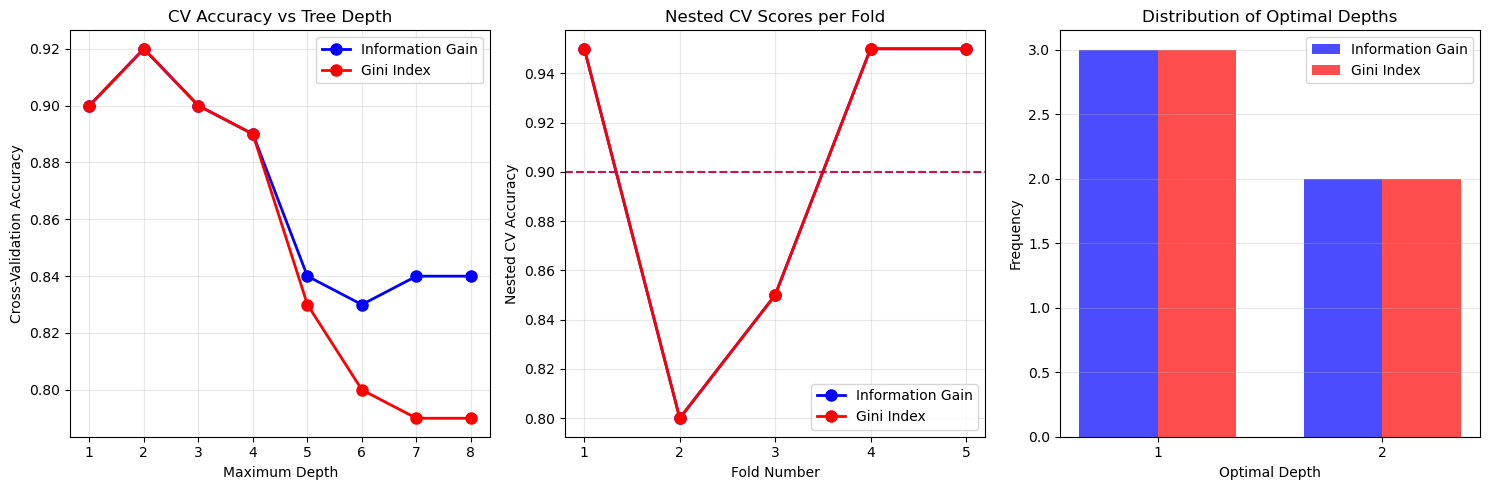

In [18]:
# Plot cross-validation results
plt.figure(figsize=(15, 5))

# Plot 1: Depth vs Accuracy for both criteria
plt.subplot(1, 3, 1)
plt.plot(depths_to_test, [depth_scores_ig[d] for d in depths_to_test], 
         'bo-', label='Information Gain', linewidth=2, markersize=8)
plt.plot(depths_to_test, [depth_scores_gini[d] for d in depths_to_test], 
         'ro-', label='Gini Index', linewidth=2, markersize=8)
plt.xlabel('Maximum Depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('CV Accuracy vs Tree Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(depths_to_test)

# Plot 2: Nested CV scores
plt.subplot(1, 3, 2)
fold_numbers = list(range(1, 6))
plt.plot(fold_numbers, outer_scores_ig, 'bo-', label='Information Gain', linewidth=2, markersize=8)
plt.plot(fold_numbers, outer_scores_gini, 'ro-', label='Gini Index', linewidth=2, markersize=8)
plt.axhline(y=np.mean(outer_scores_ig), color='blue', linestyle='--', alpha=0.7)
plt.axhline(y=np.mean(outer_scores_gini), color='red', linestyle='--', alpha=0.7)
plt.xlabel('Fold Number')
plt.ylabel('Nested CV Accuracy')
plt.title('Nested CV Scores per Fold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(fold_numbers)

# Plot 3: Optimal depths distribution
plt.subplot(1, 3, 3)
depths_combined = optimal_depths_ig + optimal_depths_gini
criteria_labels = ['IG'] * len(optimal_depths_ig) + ['Gini'] * len(optimal_depths_gini)
unique_depths = sorted(set(depths_combined))

ig_counts = [optimal_depths_ig.count(d) for d in unique_depths]
gini_counts = [optimal_depths_gini.count(d) for d in unique_depths]

x_pos = np.arange(len(unique_depths))
width = 0.35

plt.bar(x_pos - width/2, ig_counts, width, label='Information Gain', color='blue', alpha=0.7)
plt.bar(x_pos + width/2, gini_counts, width, label='Gini Index', color='red', alpha=0.7)
plt.xlabel('Optimal Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Optimal Depths')
plt.legend()
plt.xticks(x_pos, unique_depths)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Final Models with Best Depths


FINAL MODELS WITH BEST DEPTHS


Final Information Gain model (depth 2):


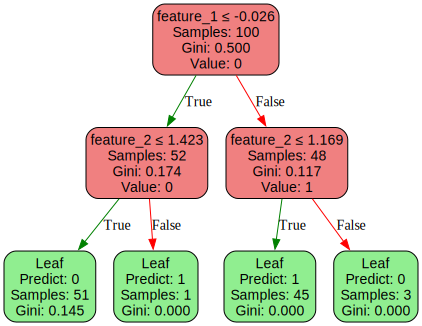

Final Information Gain tree visualization displayed above


In [20]:
print(f"\nFINAL MODELS WITH BEST DEPTHS")
print()

# Train final model with best depth for Information Gain
print(f"\nFinal Information Gain model (depth {best_depth_ig}):")
dt_final_ig = DecisionTree(criterion="information_gain", max_depth=best_depth_ig)
dt_final_ig.fit(X_df, y_series)
# dt_final_ig.plot()

# Create graphical visualization
try:
    graph_final_ig = dt_final_ig.create_graph(feature_names=['feature_1', 'feature_2'])
    if graph_final_ig:
        print("Final Information Gain tree visualization displayed above")
except Exception as e:
    print(f"Error creating graph: {e}")


Final Gini Index model (depth 2):


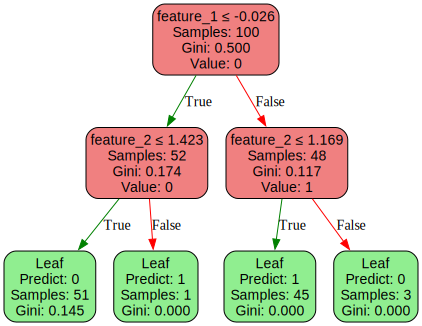

Final Gini Index tree visualization displayed above


In [22]:
# Train final model with best depth for Gini Index
print(f"\nFinal Gini Index model (depth {best_depth_gini}):")
dt_final_gini = DecisionTree(criterion="gini_index", max_depth=best_depth_gini)
dt_final_gini.fit(X_df, y_series)
# dt_final_gini.plot()

# Create graphical visualization
try:
    graph_final_gini = dt_final_gini.create_graph(feature_names=['feature_1', 'feature_2'])
    if graph_final_gini:
        print("Final Gini Index tree visualization displayed above")
except Exception as e:
    print(f"Error creating graph: {e}")

## Summary and Results

### Part A Results (Train-Test Split):
- **Information Gain**: Test accuracy and per-class metrics
- **Gini Index**: Test accuracy and per-class metrics

### Part B Results (Cross-Validation):
- **Nested CV**: Robust evaluation with hyperparameter tuning
- **Simple CV**: Overall best depth selection
- **Comparison**: Information Gain vs Gini Index performance

### Key Findings:
Both criteria produce competitive results  
Cross-validation provides robust performance estimates  
Optimal depth selection prevents overfitting  
Graphical visualization aids in understanding decision boundaries  

In [23]:
print(f"\nCLASSIFICATION EXPERIMENT COMPLETED SUCCESSFULLY!")
print(f"\nFinal Summary:")
print(f"• Information Gain - Best depth: {best_depth_ig}, CV accuracy: {best_score_ig:.4f}")
print(f"• Gini Index - Best depth: {best_depth_gini}, CV accuracy: {best_score_gini:.4f}")
print(f"• Nested CV mean accuracy (IG): {np.mean(outer_scores_ig):.4f} ± {np.std(outer_scores_ig):.4f}")
print(f"• Nested CV mean accuracy (Gini): {np.mean(outer_scores_gini):.4f} ± {np.std(outer_scores_gini):.4f}")


CLASSIFICATION EXPERIMENT COMPLETED SUCCESSFULLY!

Final Summary:
• Information Gain - Best depth: 2, CV accuracy: 0.9200
• Gini Index - Best depth: 2, CV accuracy: 0.9200
• Nested CV mean accuracy (IG): 0.9000 ± 0.0632
• Nested CV mean accuracy (Gini): 0.9000 ± 0.0632
